In [2]:
#imports for a Fashion Mnist predictor model

import pandas as pd
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
pca= PCA(n_components=0.95)

#reading the traiining dataset
data=pd.read_csv(r'C:\Users\97252\OneDrive\שולחן העבודה\הדנת- עבודת גמר\Fashion Mnist dataset\fashion-mnist_train.csv')

X = data.drop("label",axis = 1)
y = data.label

#shows the dataset
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#PERFORMING PCA ON THE TRAINING DATA since it's very big

pcadX = pca.fit_transform(X)

# splitting the data into training and testing sets, with the pcad data(features)

X_train, X_test, y_train, y_test = train_test_split(pcadX, y, test_size=0.2, random_state=0)

pcadX.shape


(60000, 187)

In [15]:
X.shape

(60000, 784)

In [ ]:
#training and predicting on the PCA-d data using-
#K-Neighbors
#Decision Tree
#Random Forest
#AdaBoost
#Gradient Boosting

%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np

classifiers = [
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    AdaBoostClassifier(),
    ]


for classifier in classifiers:
    model = classifier.fit(X_train, y_train)
    print("\n The Classifier is \n " +str(classifier))
    print("\n The Model's Score is %.3f" % model.score(X_test, y_test))
    y_pred_best = model.predict(X_test)
    cm=confusion_matrix(y_test, y_pred_best, labels=None, sample_weight=None)
    print(cm)
    print(classification_report(y_test,y_pred_best))
    #cross validation- only for KNN classifier (time reasons)
    if (str(classifier) == 'KNeighborsClassifier(n_neighbors=5)'):  #CROSS VALIDATION! activate only KNN
        score= cross_val_score(classifier, Xa_test, ya_test, cv=4)
        print("This model's Score with cross validation is ", score)
        
    #sns.heatmap(pd.DataFrame(classification_report).iloc[:-1, :].T, annot=True)


 The Classifier is 
 RandomForestClassifier()

 The Model's Score is 0.876
[[2514    1   36  104   17    2  237    0   33    0]
 [   7 2932   17   56    8    0   21    0    2    0]
 [  15    0 2452   22  338    0  146    0   18    0]
 [  66    6   18 2783   82    0   76    0    8    1]
 [   8    3  236  139 2438    1  108    0    7    0]
 [   0    0    0    1    0 2860    0   86   11   20]
 [ 507    3  352   79  301    2 1746    0   50    0]
 [   0    0    0    0    0   60    0 2791    4  126]
 [   3    0   17   11   17    8   39    8 2909    3]
 [   0    0    1    1    0   39    2  124    2 2859]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      2944
           1       1.00      0.96      0.98      3043
           2       0.78      0.82      0.80      2991
           3       0.87      0.92      0.89      3040
           4       0.76      0.83      0.79      2940
           5       0.96      0.96      0.96      2978
           6  

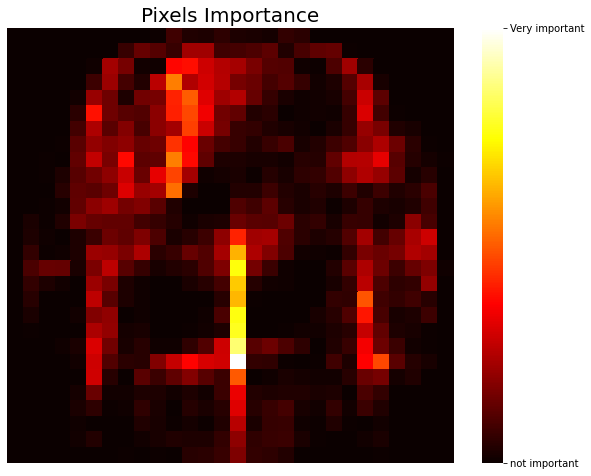

In [96]:
#PLOTTING PIXELS IMPORATNCE! BY RANDOM FORESTS

model = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
model.fit(X, y) #on the ORIGINAL dataset (features: X! so we won't lose features according to the PCA procedure)

importances = model.feature_importances_
pixels = np.reshape(importances,(28,28)) #since the shape of the dataset is (60000,728)

plt.figure(figsize= (10,8))
plot = sns.heatmap(pixels,cmap=plt.cm.hot)
plt.xticks([], [])
plot.set_yticks([])
plot.set_yticks([], minor=True)
colorbar = plot.collections[0].colorbar
colorbar.set_ticks([0,max(importances)])
colorbar.set_ticklabels(['not important','Very important'])
plt.title('Pixels Importance',size = 20)
plt.show()

In [98]:
#fun fact! this is the second time Random Forest is used. the first time on the PCA-d data, and now on the ORIGINAL one.

#Let's compare the model's results according to the datas!

print('Random Forest classifier on the ORIGINAL data results in:')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

print("\n The Model's Score is %.3f" % model.score(X_test, y_test))

y_pred_best = model.predict(X_test)
cm=confusion_matrix(y_test, y_pred_best, labels=None, sample_weight=None)
print(cm)
print(classification_report(y_test,y_pred_best))

#seeing this, the model works better on the PCA-d data. since it has less features..

Random Forest classifier on the ORIGINAL data results in:

 The Model's Score is 0.761
[[2316   21  127  370   17    2    7    0   84    0]
 [   5 2652   60  316    5    2    0    0    3    0]
 [  30    1 2127   34  748    2    6    0   43    0]
 [  88   19  112 2714   82    1   11    0   13    0]
 [   8    9  360  387 2150    2    3    0   21    0]
 [   1    1    0    5    0 2531    0  263   39  138]
 [ 700    6  610  288 1224    4   85    0  123    0]
 [   0    0    0    0    0   45    0 2676    4  256]
 [  13    4  105   61   14   31    5   12 2767    3]
 [   1    0    0    3    0   24    0  171    8 2821]]
              precision    recall  f1-score   support

           0       0.73      0.79      0.76      2944
           1       0.98      0.87      0.92      3043
           2       0.61      0.71      0.66      2991
           3       0.65      0.89      0.75      3040
           4       0.51      0.73      0.60      2940
           5       0.96      0.85      0.90      2978
   

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

#predicting by Logistic Regression on the ORIGINAL dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

#Creating and training the model
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

#Evaluating the model
cfm = metrics.confusion_matrix(y_test, predictions)
print(classification_report(y_test, predictions))

In [ ]:
from sklearn.naive_bayes import GaussianNB
import numpy as np

#Naive Bayes algorithm

naive_bayes = GaussianNB()
print(np.mean(cross_val_score(estimator=naive_bayes, cv=4, scoring='accuracy', X=x_train_prep_1d, y=y_train)))
naive_bayes.fit(x_train_prep_1d, y_train)

In [27]:
#CNN- NEURAL NETWORK predictor

#Define, Compile, and Fit the Keras Classification Model

model = Sequential()
model.add(Dense(500, activation='relu', input_dim=36))  #the input layer which specifies the activation function and the number of input dimensions, which in our case is 36 predictors.
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(4, activation='softmax')) #The fifth line of code creates the output layer with four nodes because there are four output classes

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

print(X_train.shape)
print(y_train.shape)

# normalize to range 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0


# build the model
model.fit(X_train, y_train, epochs=1)

#Predict on the Test Data and Compute Evaluation Metrics;

#pred_train= model.predict(X_train)
#scores2 = model.evaluate(X_train, y_train, verbose=0)
#print('Accuracy on train data: {}% \n Error on train data: {}'.format(scores2[1], 1 - scores2[1]))    

print('')

pred_test= model.predict(X_test)
scores = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores[1], 1 - scores[1]))   



(30000, 784)
(30000,)


ValueError: Error when checking input: expected dense_42_input to have shape (36,) but got array with shape (784,)